# Ocean Salinity Analysis

In [2]:
import pandas as pd
df= pd.read_csv('data/temp_salinity.csv')
df.head()
df=df.dropna()

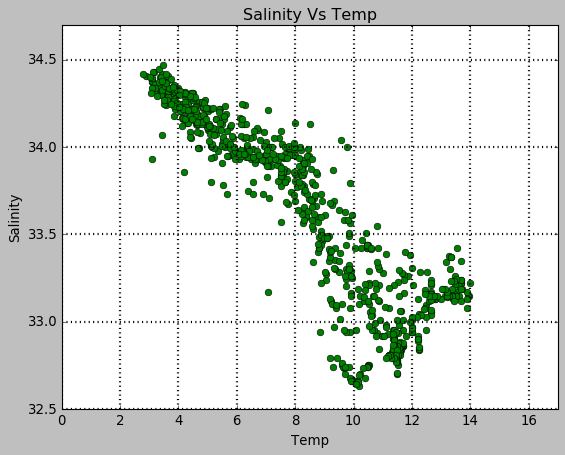

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
ip= np.array(df["T_degC"])
op= np.array(df["Salnty"])
plt.figure()
plt.title("Salinity Vs Temp")
plt.xlabel('Temp')
plt.ylabel('Salinity')
plt.plot(ip,op,"go")
plt.axis([0,17,32.5,34.7])
plt.grid(linewidth=2)

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test=\
train_test_split(ip,op,test_size=0.25)
print(ip[0:10])
print(op[0:10])

[10.5  10.46 10.46 10.45 10.45 10.45 10.45 10.24 10.06  9.86]
[33.44  33.44  33.437 33.42  33.421 33.431 33.44  33.424 33.42  33.494]


[0, 17, 32.5, 34.7]

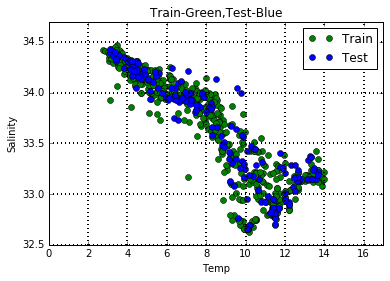

In [5]:
plt.figure()
plt.title("Train-Green,Test-Blue")
plt.xlabel('Temp')
plt.ylabel('Salinity')
plt.plot(ip_train,op_train,"go",label="Train")
plt.plot(ip_test,op_test,"bo",label="Test")
plt.legend(loc=1)
plt.grid(linewidth=2)
plt.axis([0,17,32.5,34.7])

# Train the data

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=ip_train.reshape(-1,1)
# op_train=op_train.reshape(-1,1)
model.fit(X,op_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

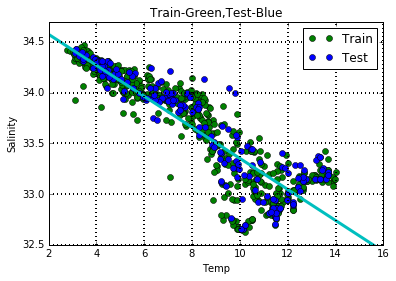

In [7]:
plt.figure()
plt.title("Train-Green,Test-Blue")
plt.xlabel('Temp')
plt.ylabel('Salinity')
plt.plot(ip_train,op_train,"go",label="Train")
plt.plot(ip_test,op_test,"bo",label="Test")
plt.legend(loc=1)
plt.grid(linewidth=2)
plt.axis([2,16,32.5,34.7])
#regession line:::
plt.plot([2,16],[model.predict([[2]])[0],model.predict([[16]])[0]],linewidth=3,color='c')

In [8]:
print(X[0:10])
print(op_train[0:10])
model.score(X,op_train.reshape(-1,1))

[[ 5.93]
 [ 8.25]
 [ 9.88]
 [ 7.5 ]
 [11.25]
 [ 8.06]
 [ 8.88]
 [ 9.04]
 [ 7.25]
 [ 3.32]]
[33.934 33.842 33.793 33.78  32.81  33.77  33.732 33.272 33.963 34.343]


0.7967576310952972

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2=r2_score(op,model.predict(ip.reshape(-1,1)))# This should Have arguements as actual output to the predicted output
print(r2)
mse =mean_squared_error(op,model.predict(ip.reshape(-1,1)))
mse

0.7939364540027749


0.057305141353687854

# -------------------------------------------------------------------------

# Diode Transfer Characteristics Analysis

In [28]:
import pandas as pd
df= pd.read_excel('data/Diode.xlsx')
df.head()
df=df.dropna()
df

,voltage,current
0,-5.00,-2.830792
1,-4.99,-2.554154
2,-4.98,-6.396905
3,-4.97,-6.759344
4,-4.96,-7.020419
...,...,...
996,4.96,1020.261835
997,4.97,746.712271
998,4.98,697.949173
999,4.99,988.395364


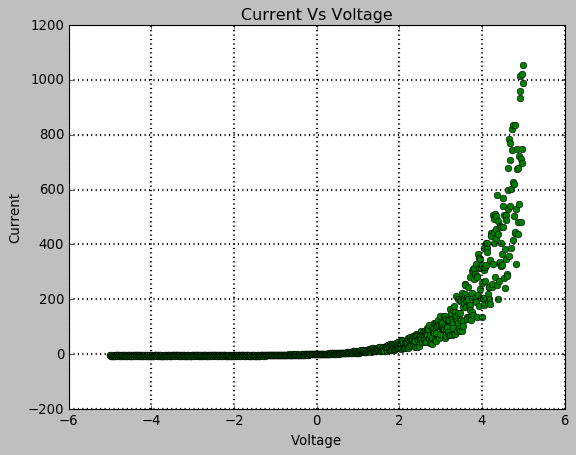

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
ip= np.array(df["voltage"])
op= np.array(df["current"])
plt.figure()
plt.title("Current Vs Voltage")
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.plot(ip,op,"go")
# plt.axis([-5,17,32.5,34.7])
plt.grid(linewidth=2)

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test=\
train_test_split(ip,op,test_size=0.3)
print(ip[0:10])
print(op[0:10])

[-5.   -4.99 -4.98 -4.97 -4.96 -4.95 -4.94 -4.93 -4.92 -4.91]
[-2.83 -2.55 -6.4  -6.76 -7.02 -5.54 -4.85 -6.94 -5.02 -5.79]


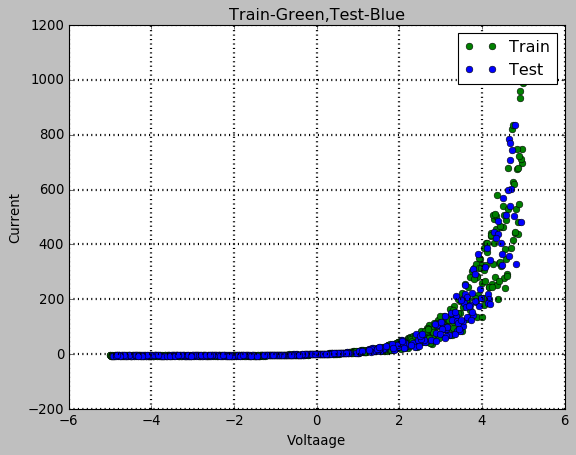

In [31]:
plt.figure()
plt.title("Train-Green,Test-Blue")
plt.xlabel('Voltaage')
plt.ylabel('Current')
plt.plot(ip_train,op_train,"go",label="Train")
plt.plot(ip_test,op_test,"bo",label="Test")
plt.legend(loc=1)
plt.grid(linewidth=2)

In [32]:
%precision 2
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
# QC=poly.fit_transform(ip.reshape(-1,1))
QC1=poly.fit_transform(ip_train.reshape(-1,1))# Quadratic Coefficient
QC2=poly.fit_transform(ip_test.reshape(-1,1))
QC1[0:5]

array([[1.00e+00, 2.56e+00, 6.55e+00, 1.68e+01, 4.29e+01, 1.10e+02],
       [1.00e+00, 4.22e+00, 1.78e+01, 7.52e+01, 3.17e+02, 1.34e+03],
       [1.00e+00, 2.79e+00, 7.78e+00, 2.17e+01, 6.06e+01, 1.69e+02],
       [1.00e+00, 8.20e-01, 6.72e-01, 5.51e-01, 4.52e-01, 3.71e-01],
       [1.00e+00, 1.92e+00, 3.69e+00, 7.08e+00, 1.36e+01, 2.61e+01]])

In [33]:
pmodel = LinearRegression()
pmodel.fit(QC1,op_train)
print("Actual Outputs",op_test[0:2])
print("predicted values on test\n",pmodel.predict(QC2[0:2]))
QC[0:2]

Actual Outputs [42.03  0.48]
predicted values on test
 [40.76  8.18]


array([[ 1.00e+00, -6.00e+00,  3.60e+01, -2.16e+02,  1.30e+03, -7.78e+03],
       [ 1.00e+00, -5.99e+00,  3.59e+01, -2.15e+02,  1.29e+03, -7.70e+03]])

In [34]:
IP=np.linspace(-6,6,1000).reshape(-1,1)# because the input is in coloumns format... so we change it
#regression line

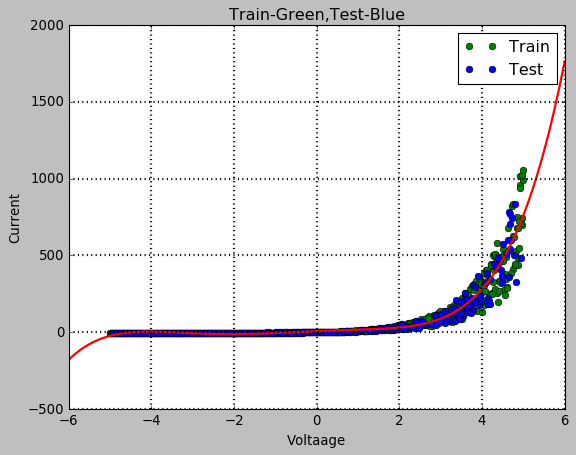

In [35]:
plt.figure()
plt.title("Train-Green,Test-Blue")
plt.xlabel('Voltaage')
plt.ylabel('Current')
plt.plot(ip_train,op_train,"go",label="Train")
plt.plot(ip_test,op_test,"bo",label="Test")
plt.legend(loc=1)
plt.grid(linewidth=2)
QC=poly.fit_transform(IP)
# print(QC[0:5])
plt.plot(IP,pmodel.predict(QC),c='r',linewidth=2)
# plt.axis([-10,10,-200,1200])

In [36]:
print("R Squared value for Diode Analysis is",pmodel.score(QC1,op_train))

R Squared value for Diode Analysis is 0.9128404990169283


In [120]:
#Mean Square Error is

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2=r2_score(op_test,pmodel.predict(QC2).reshape(-1,1))# This should Have arguements as actual output to the predicted output
print(r2)
mse =mean_squared_error(op_test,pmodel.predict(QC2).reshape(-1,1))
mse/1000

0.9109334457816891


2.180647479079717